In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Age', ylabel='Pclass'>

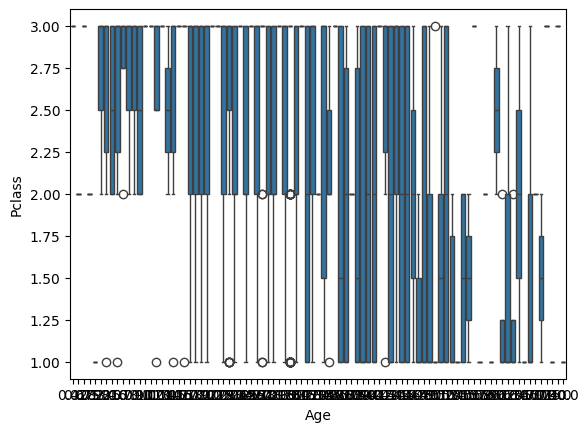

In [7]:
sns.boxplot(x="Age",y="Pclass",data=df)

<Axes: xlabel='Age', ylabel='Count'>

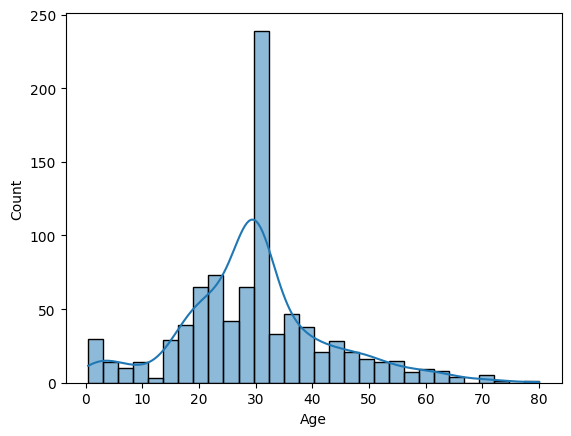

In [8]:
sns.histplot(x=df["Age"],kde=True)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


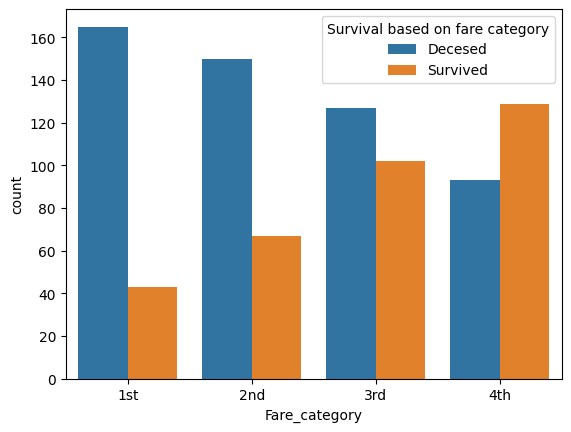

In [11]:
bins=[0,7.9,14.45,31,512.33]
labels=["1st","2nd","3rd","4th"]
df["Fare_category"]=pd.cut(df["Fare"],bins=bins,labels=labels)
x=sns.countplot(x="Fare_category",hue="Survived",data=df).legend(labels=["Decesed","Survived"])
x.set_title("Survival based on fare category")

<Axes: xlabel='Sex', ylabel='Fare'>

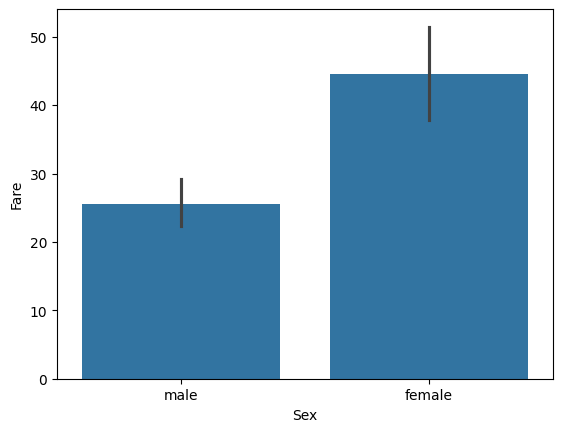

In [14]:
sns.barplot(x="Sex",y="Fare",data=df)

<Axes: xlabel='Age', ylabel='Fare'>

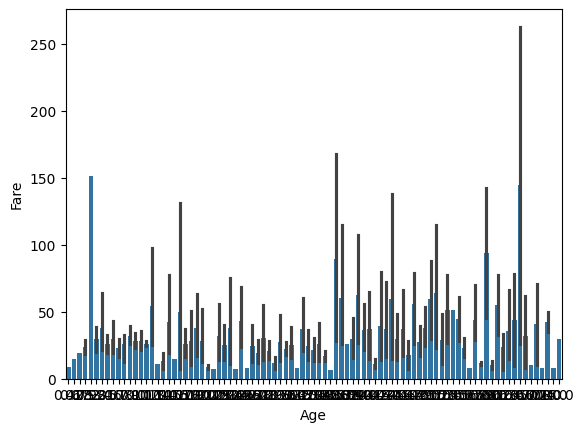

In [15]:
sns.barplot(x="Age",y="Fare",data=df)

<Axes: xlabel='Sex', ylabel='Fare'>

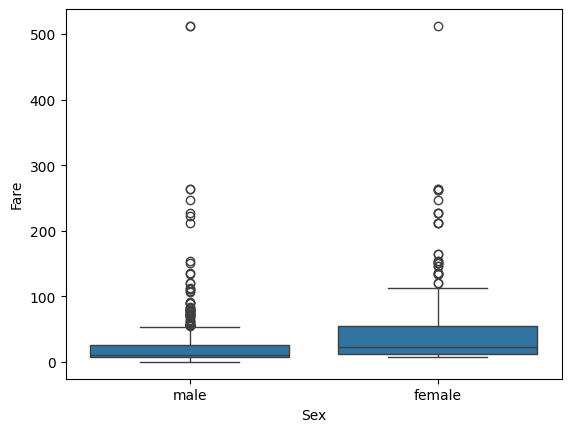

In [23]:
sns.boxplot(x="Sex",y="Fare",data=df)

<Axes: xlabel='Pclass', ylabel='Fare'>

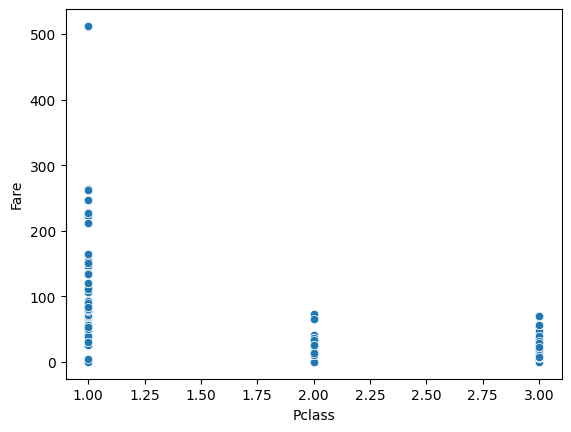

In [24]:
sns.scatterplot(x="Pclass",y="Fare",data=df)

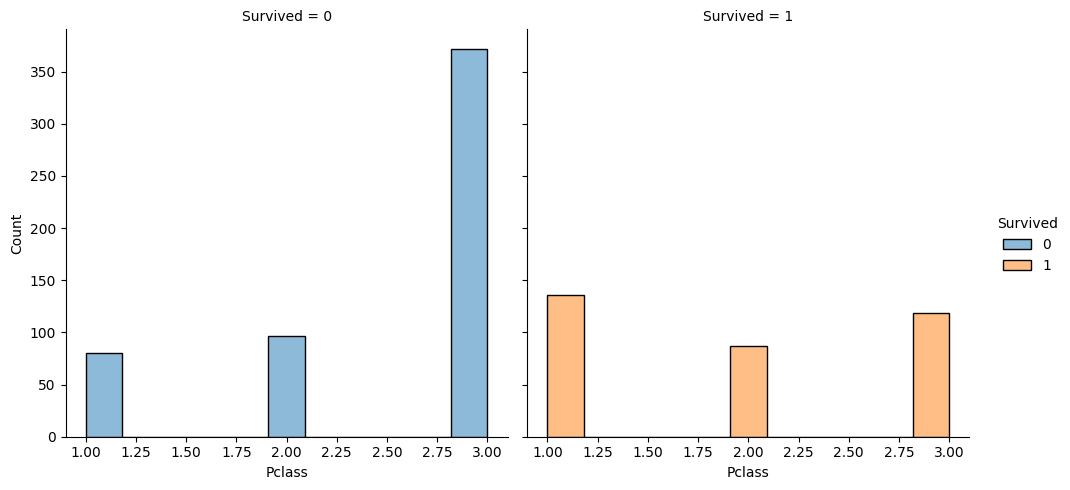

In [21]:
sns.displot(x="Pclass",hue="Survived",col="Survived",data=df)

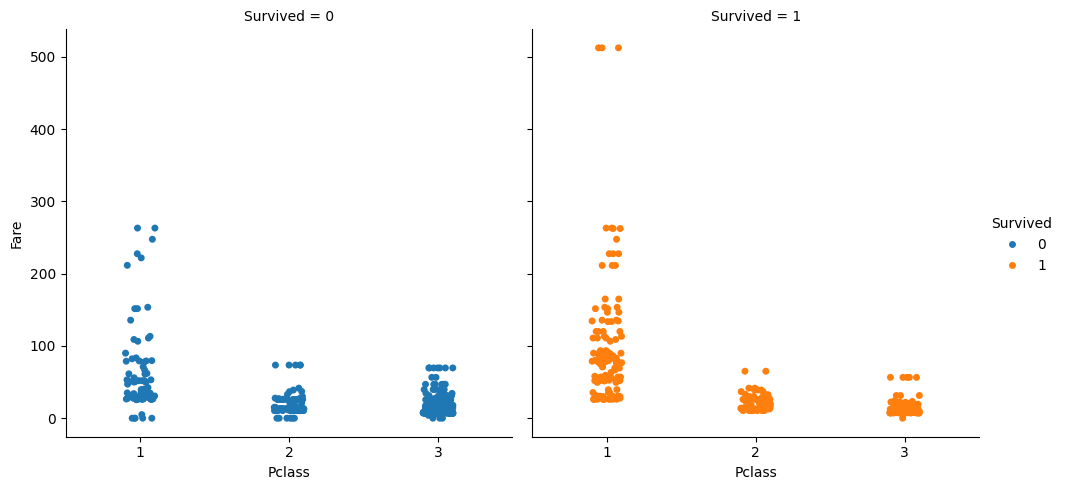

In [25]:
sns.catplot(x="Pclass",y="Fare",hue="Survived",col="Survived",data=df)

In [26]:
df["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [28]:
Q1=df["Fare"].quantile(0.25)
Q3=df["Fare"].quantile(0.75)
IQR=1.5*(Q3-Q1)
lb=Q1-IQR
ub=Q3+IQR
outliers=df[(df["Fare"]<lb)| (df["Fare"]>ub)]
outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_category
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,4th
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,4th
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C,4th
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,B96 B98,C,4th
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C,4th
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,B96 B98,S,4th
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C,4th
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,B96 B98,S,4th
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,B96 B98,S,4th


<Axes: xlabel='Fare', ylabel='Count'>

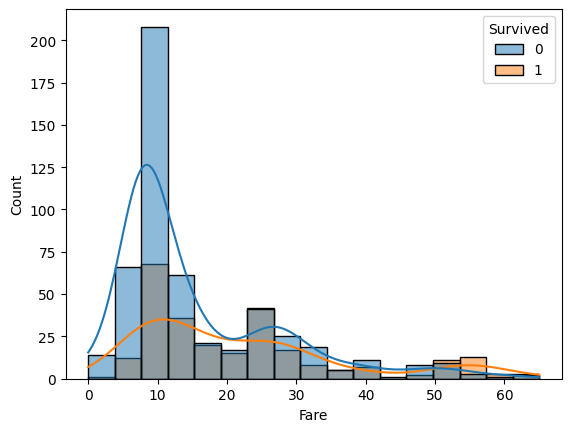

In [34]:
filtered_df=df[(df["Fare"]>=lb)& (df["Fare"]<=ub)]
sns.histplot(x="Fare",hue="Survived",data=filtered_df,kde=True)

<Axes: xlabel='Sex', ylabel='Age'>

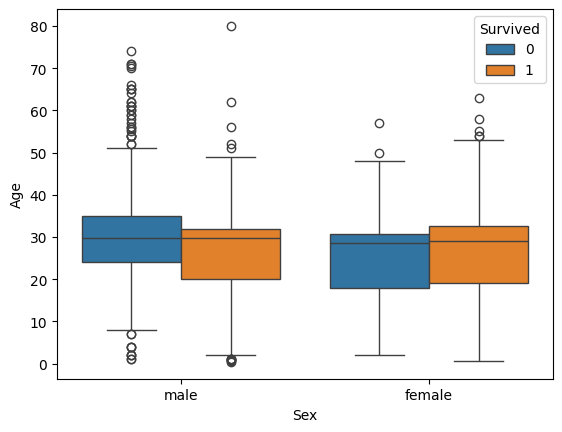

In [35]:
sns.boxplot(x="Sex",y="Age",hue="Survived",data=filtered_df)